# Shrimper's Trust Membership Report

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
from members.data import load_members

members = load_members("../data/members.csv")

print(f"Imported {len(members)} members.")

Imported 1594 members.


## Headlines

In [3]:
from datetime import datetime, timedelta
print("--------------------------------------------------------")
print("Report run on: ", datetime.today())
print("Number of members: ", len(members))
date_thirty_days_ago = datetime.today() - timedelta(days=30)
print("Number of new members (last 30 days): ", len([m for m in members if m.date_joined and m.date_joined > date_thirty_days_ago]))
print("--------------------------------------------------------")
print("Average age of members: ", sum([m.age for m in members if m.age]) / len([m for m in members if m.age]))
print("Average age of life members: ", sum([m.age for m in members if m.age and m.life_member]) / len([m for m in members if m.age and m.life_member]))
print("--------------------------------------------------------")
male_members = [m for m in members if m.gender == "Male"]
female_members = [m for m in members if m.gender == "Female"]
print("Average male age: ", sum([m.age for m in male_members if m.age]) / len([m for m in male_members if m.age]))
print("Average female age: ", sum([m.age for m in female_members if m.age]) / len([m for m in female_members if m.age]))
print("--------------------------------------------------------")
southend_members = [m for m in members if m.postcode and m.postcode.startswith("SS")]
print("Number of Southend members: ", len(southend_members))
print("Average age of Southend members: ", sum([m.age for m in southend_members if m.age]) / len([m for m in southend_members if m.age]))
print("--------------------------------------------------------")

--------------------------------------------------------
Report run on:  2024-11-10 19:03:54.911534
Number of members:  1594
Number of new members (last 30 days):  3
--------------------------------------------------------
Average age of members:  54.5297157622739
Average age of life members:  58.31054131054131
--------------------------------------------------------
Average male age:  54.29308975377283
Average female age:  55.75
--------------------------------------------------------
Number of Southend members:  1037
Average age of Southend members:  54.223320158102766
--------------------------------------------------------


## Age and gender distribution of members

Genders are guessed based on first names

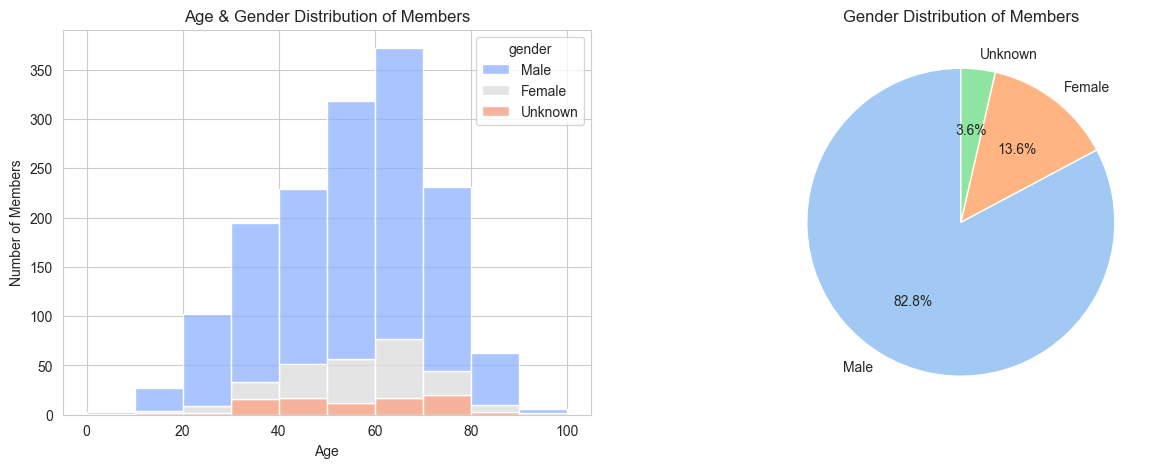

In [4]:
from members.charts.membership import plot_gender_distibution_pie, plot_age_and_gender_distribution

fig, (ax1, ax2) = plt.subplots(1, 2)
plot_gender_distibution_pie(ax2, members)
plot_age_and_gender_distribution(ax1, members)
fig.set_size_inches(15, 5)

plt.show()

## Membership

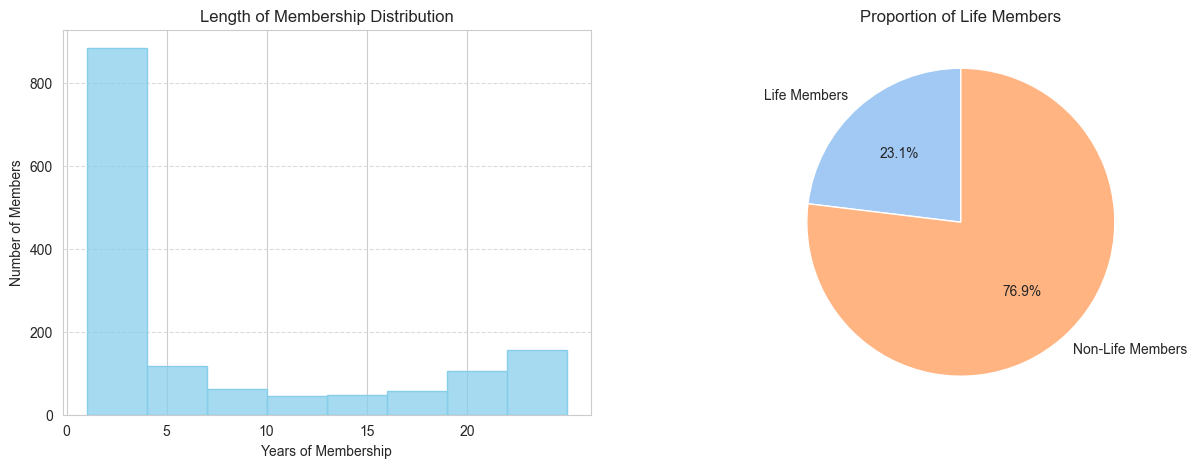

In [5]:
from members.charts.membership import plot_length_of_membership_distribution, plot_pie_of_life_members

fig, (ax1, ax2) = plt.subplots(1, 2)
plot_length_of_membership_distribution(ax1, members)
plot_pie_of_life_members(ax2, members)
fig.set_size_inches(15, 5)

plt.show()

## Renewals

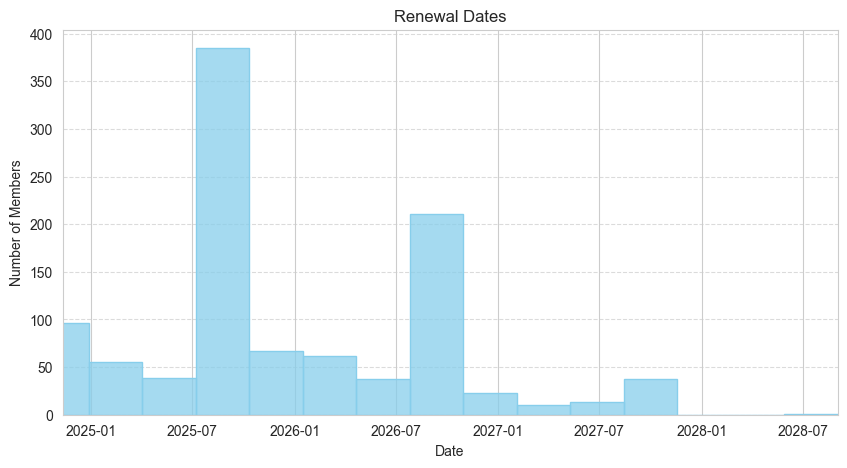

In [6]:
from members.charts.membership import plot_renewal_dates

fig, (ax1) = plt.subplots(1, 1)
plot_renewal_dates(ax1, members)
fig.set_size_inches(10, 5)

plt.show()

## Location

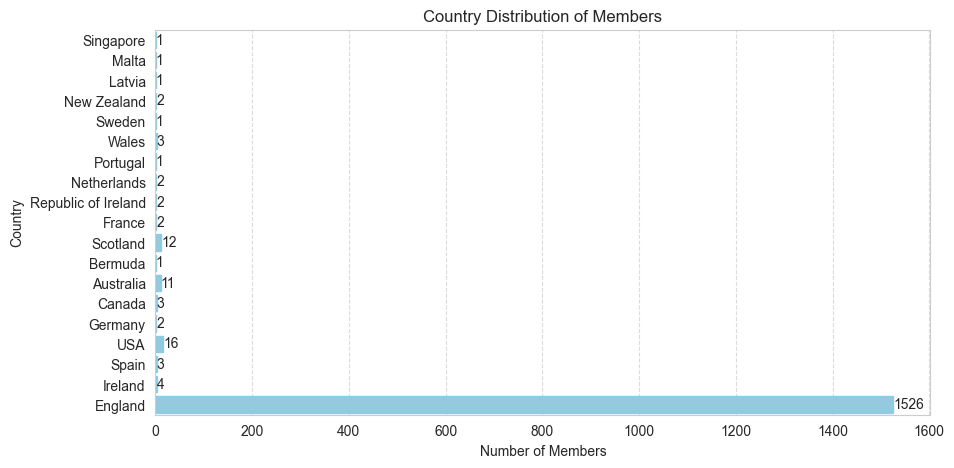

In [7]:
from members.charts.location import plot_country_distribution

fig, (ax1) = plt.subplots(1, 1)
plot_country_distribution(ax1, members)
fig.set_size_inches(10, 5)

plt.show()

In [8]:
import gmplot
import os
southend = [51.540674,0.6947368]
gmap = gmplot.GoogleMapPlotter(*southend, 14, apikey=os.environ["GOOGLE_API_KEY"], map_type="hybrid")

member_locations = [m.location for m in members]

gmap.heatmap(
    *zip(*member_locations),
    radius=30,
    max_intensity=1,
    gradient=[
    (0, 0, 0, 0),       # Transparent
    (179, 0, 51, 0.4),    # Deep Red (more transparent)
    (255, 77, 77, 0.6),   # Reddish-Pink
    (255, 179, 102, 0.8), # Orange
    (255, 255, 153, 1)  # Soft Yellow (less transparent)
]
)

# Not displayed because of private data
gmap.draw('members.html')

## Membership distribution by Southend postcode

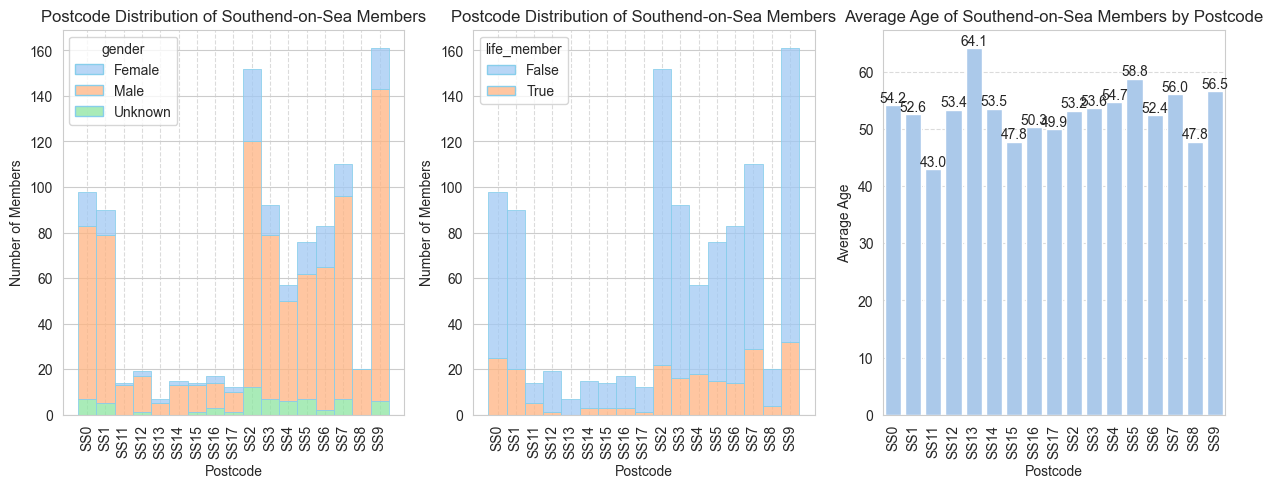

In [9]:
from members.charts.location import plot_southend_postcode_distribution, plot_southend_postcode_average_age

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plot_southend_postcode_distribution(ax1, members)
plot_southend_postcode_distribution(ax2, members, hue="life_member")
plot_southend_postcode_average_age(ax3, members)
fig.set_size_inches(15, 5)


### Breakdown for Life Members

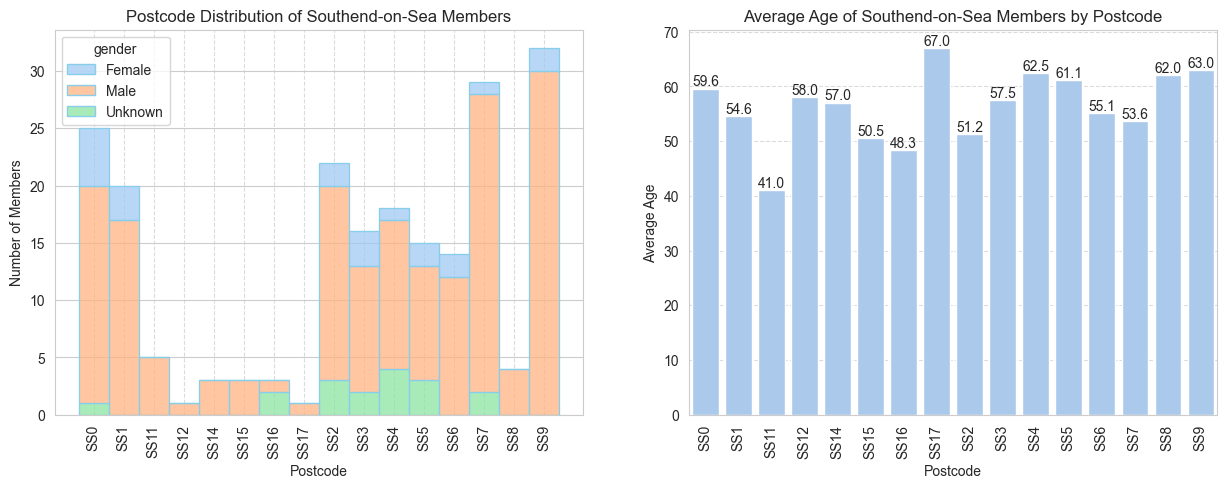

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
life_members = [m for m in members if m.life_member]
plot_southend_postcode_distribution(ax1, life_members)
plot_southend_postcode_average_age(ax2, life_members)
fig.set_size_inches(15, 5)